In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Read the CSV file
df = pd.read_csv('new_data.csv')

# Display the data types and first few rows
print(df.dtypes)
print("\nFirst few rows of the dataset:")
df.head()

Outcode                                   object
Postcode                                  object
Num_meters                                 int64
Total_cons_kwh                           float64
Mean_cons_kwh                            float64
Median_cons_kwh                          float64
Total                                      int64
Males                                      int64
Females                                    int64
Occupied_Households                        int64
Cluster                                    int64
Electricity_Consumption_per_Household    float64
Population_Density                       float64
Energy_Efficiency                        float64
dtype: object

First few rows of the dataset:


,Outcode,Postcode,Num_meters,Total_cons_kwh,Mean_cons_kwh,Median_cons_kwh,Total,Males,Females,Occupied_Households,Cluster,Electricity_Consumption_per_Household,Population_Density,Energy_Efficiency
0,AL1,AL1 1BH,46,281294.98,6115.108261,5902.8,52,15,37,41,0,6860.853171,1.268293,5409.518846
1,AL1,AL1 1BZ,7,29805.40,4257.914286,4979.2,18,11,7,12,2,2483.783333,1.500000,1655.855556
2,AL1,AL1 1DU,5,34775.10,6955.020000,4940.3,81,45,36,27,0,1287.966667,3.000000,429.322222
3,AL1,AL1 1JJ,6,43955.90,7325.983333,4194.3,71,33,38,22,0,1997.995455,3.227273,619.097183
4,AL1,AL1 1JQ,8,35806.40,4475.800000,4013.0,50,31,19,22,2,1627.563636,2.272727,716.128000


In [3]:
# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for NaN values and display the count per column
nan_counts = df.isna().sum()
print("NaN values per column:")
print(nan_counts)

# Drop rows with NaN values
df_cleaned = df.dropna()

# Save the cleaned dataset
df_cleaned.to_csv('new_data_cleaned.csv', index=False)

# Display the first few rows of the cleaned dataframe
print("\nFirst few rows of the cleaned dataframe:")
df_cleaned.head()

NaN values per column:
Outcode                                   0
Postcode                                  0
Num_meters                                0
Total_cons_kwh                            0
Mean_cons_kwh                             0
Median_cons_kwh                           0
Total                                     0
Males                                     0
Females                                   0
Occupied_Households                       0
Cluster                                   0
Electricity_Consumption_per_Household    12
Population_Density                       12
Energy_Efficiency                        12
dtype: int64

First few rows of the cleaned dataframe:


,Outcode,Postcode,Num_meters,Total_cons_kwh,Mean_cons_kwh,Median_cons_kwh,Total,Males,Females,Occupied_Households,Cluster,Electricity_Consumption_per_Household,Population_Density,Energy_Efficiency
0,AL1,AL1 1BH,46,281294.98,6115.108261,5902.8,52,15,37,41,0,6860.853171,1.268293,5409.518846
1,AL1,AL1 1BZ,7,29805.40,4257.914286,4979.2,18,11,7,12,2,2483.783333,1.500000,1655.855556
2,AL1,AL1 1DU,5,34775.10,6955.020000,4940.3,81,45,36,27,0,1287.966667,3.000000,429.322222
3,AL1,AL1 1JJ,6,43955.90,7325.983333,4194.3,71,33,38,22,0,1997.995455,3.227273,619.097183
4,AL1,AL1 1JQ,8,35806.40,4475.800000,4013.0,50,31,19,22,2,1627.563636,2.272727,716.128000


+----------------------+----------------------+--------------------------+
| Method               |   Number of Outliers | Percentage of Outliers   |
+======================+======================+==========================+
| Local Outlier Factor |                 8584 | 10.00%                   |
+----------------------+----------------------+--------------------------+
| Isolation Forest     |                 8584 | 10.00%                   |
+----------------------+----------------------+--------------------------+
| Ensemble Method      |                14850 | 17.30%                   |
+----------------------+----------------------+--------------------------+

Agreement between methods:
+-------------------------------+-----------------------------+---------------------------+
| Agreement Between             |   Number of Common Outliers | Percentage of Agreement   |
+===============================+=============================+===========================+
| LOF and Isolation F

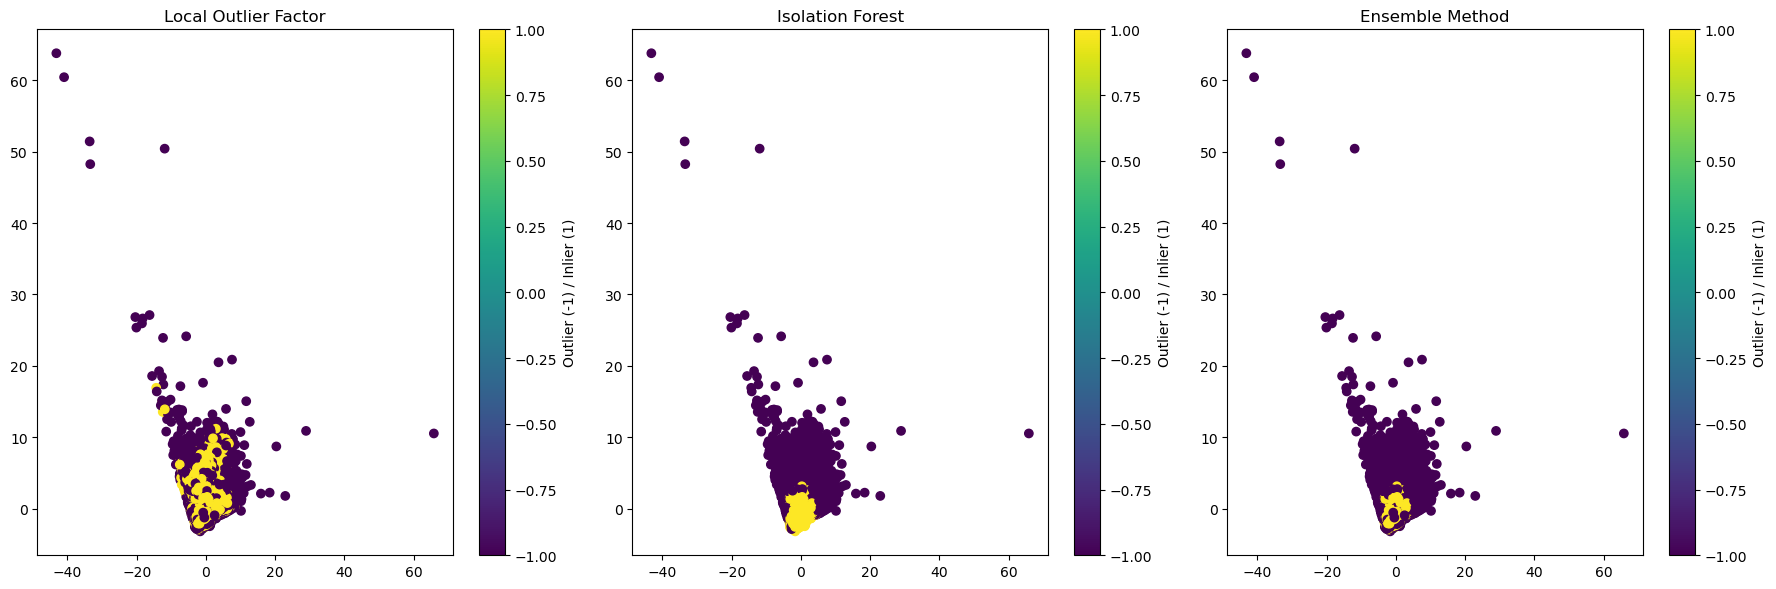

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from tabulate import tabulate

# Read the cleaned CSV file
df = pd.read_csv('new_data_cleaned.csv')

# Initialize LabelEncoder
le = LabelEncoder()

# Label encode 'Outcode' and 'Postcode'
df['Outcode_encoded'] = le.fit_transform(df['Outcode'])
df['Postcode_encoded'] = le.fit_transform(df['Postcode'])

# Select numerical columns for outlier detection
numerical_cols = ['Num_meters', 'Total_cons_kwh', 'Mean_cons_kwh', 'Median_cons_kwh', 'Total', 
                  'Males', 'Females', 'Occupied_Households', 'Cluster', 
                  'Electricity_Consumption_per_Household', 'Population_Density', 'Energy_Efficiency',
                  'Outcode_encoded', 'Postcode_encoded']

# Prepare the data
X = df[numerical_cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred_lof = lof.fit_predict(X_scaled)
lof_outliers = sum(y_pred_lof == -1)

# Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
y_pred_iso = iso_forest.fit_predict(X_scaled)
iso_outliers = sum(y_pred_iso == -1)

# Ensemble method (combining LOF and Isolation Forest)
y_pred_ensemble = np.where((y_pred_lof == -1) | (y_pred_iso == -1), -1, 1)
ensemble_outliers = sum(y_pred_ensemble == -1)

# Calculate percentages
total_samples = len(X)
lof_percentage = (lof_outliers / total_samples) * 100
iso_percentage = (iso_outliers / total_samples) * 100
ensemble_percentage = (ensemble_outliers / total_samples) * 100

# Create a comparison table
comparison_table = [
    ["Method", "Number of Outliers", "Percentage of Outliers"],
    ["Local Outlier Factor", lof_outliers, f"{lof_percentage:.2f}%"],
    ["Isolation Forest", iso_outliers, f"{iso_percentage:.2f}%"],
    ["Ensemble Method", ensemble_outliers, f"{ensemble_percentage:.2f}%"]
]

print(tabulate(comparison_table, headers="firstrow", tablefmt="grid"))

# Calculate agreement between methods
lof_iso_agreement = sum((y_pred_lof == -1) & (y_pred_iso == -1))
lof_ensemble_agreement = sum((y_pred_lof == -1) & (y_pred_ensemble == -1))
iso_ensemble_agreement = sum((y_pred_iso == -1) & (y_pred_ensemble == -1))

agreement_table = [
    ["Agreement Between", "Number of Common Outliers", "Percentage of Agreement"],
    ["LOF and Isolation Forest", lof_iso_agreement, f"{(lof_iso_agreement / min(lof_outliers, iso_outliers)) * 100:.2f}%"],
    ["LOF and Ensemble", lof_ensemble_agreement, f"{(lof_ensemble_agreement / lof_outliers) * 100:.2f}%"],
    ["Isolation Forest and Ensemble", iso_ensemble_agreement, f"{(iso_ensemble_agreement / iso_outliers) * 100:.2f}%"]
]

print("\nAgreement between methods:")
print(tabulate(agreement_table, headers="firstrow", tablefmt="grid"))

# Visualize outliers (using the first two principal components for simplicity)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(18, 6))

# LOF
plt.subplot(131)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_lof, cmap='viridis')
plt.title('Local Outlier Factor')
plt.colorbar(label='Outlier (-1) / Inlier (1)')

# Isolation Forest
plt.subplot(132)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_iso, cmap='viridis')
plt.title('Isolation Forest')
plt.colorbar(label='Outlier (-1) / Inlier (1)')

# Ensemble
plt.subplot(133)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_ensemble, cmap='viridis')
plt.title('Ensemble Method')
plt.colorbar(label='Outlier (-1) / Inlier (1)')

plt.tight_layout()
plt.savefig('outlier_comparison.png')
print("Outlier comparison plot saved as 'outlier_comparison.png'")

In [5]:


# Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred_lof = lof.fit_predict(X_scaled)

# Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
y_pred_iso = iso_forest.fit_predict(X_scaled)

# Ensemble method (combining LOF and Isolation Forest)
y_pred_ensemble = np.where((y_pred_lof == -1) | (y_pred_iso == -1), -1, 1)

# Label the dataset
# 1 if anomalous, 0 if normal
df['Anomaly'] = np.where(y_pred_ensemble == -1, 1, 0)

# Save the labeled dataset
df.to_csv('new_data_labeled.csv', index=False)

# Display the first few rows of the labeled dataframe
print("\nFirst few rows of the labeled dataframe:")
df.head()

Labeled dataset saved as 'new_data_labeled.csv'

First few rows of the labeled dataframe:
  Outcode Postcode  Num_meters  Total_cons_kwh  Mean_cons_kwh  \
0     AL1  AL1 1BH          46       281294.98    6115.108261   
1     AL1  AL1 1BZ           7        29805.40    4257.914286   
2     AL1  AL1 1DU           5        34775.10    6955.020000   
3     AL1  AL1 1JJ           6        43955.90    7325.983333   
4     AL1  AL1 1JQ           8        35806.40    4475.800000   

   Median_cons_kwh  Total  Males  Females  Occupied_Households  Cluster  \
0           5902.8     52     15       37                   41        0   
1           4979.2     18     11        7                   12        2   
2           4940.3     81     45       36                   27        0   
3           4194.3     71     33       38                   22        0   
4           4013.0     50     31       19                   22        2   

   Electricity_Consumption_per_Household  Population_Density  \
0   

Check Class Imbalance

Class counts:
Anomaly
0    70984
1    14850
Name: count, dtype: int64


C:\Users\EZENWAJIAKU CHINEDU\AppData\Local\Temp\ipykernel_439964\2134117651.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Anomaly', data=data, palette='viridis')


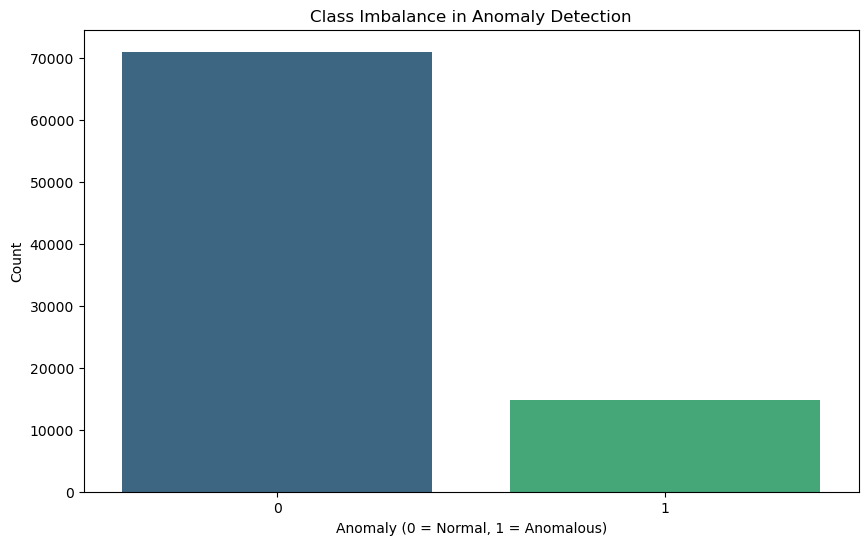

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Read the labeled CSV file
data = pd.read_csv('new_data_labeled.csv')

# Check for class imbalance
class_counts = data['Anomaly'].value_counts()
print("Class counts:")
print(class_counts)

# Visualize class imbalance
plt.figure(figsize=(10, 6))
sns.countplot(x='Anomaly', data=data, palette='viridis')
plt.title('Class Imbalance in Anomaly Detection')
plt.xlabel('Anomaly (0 = Normal, 1 = Anomalous)')
plt.ylabel('Count')
plt.show()

APPLYING SMOTE TO FIX THE CLASS IMBALANCE

New class counts after SMOTE:
Anomaly
1    70984
0    70984
Name: count, dtype: int64


C:\Users\EZENWAJIAKU CHINEDU\AppData\Local\Temp\ipykernel_439964\2124879434.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')
C:\Users\EZENWAJIAKU CHINEDU\AppData\Local\Temp\ipykernel_439964\2124879434.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='viridis')


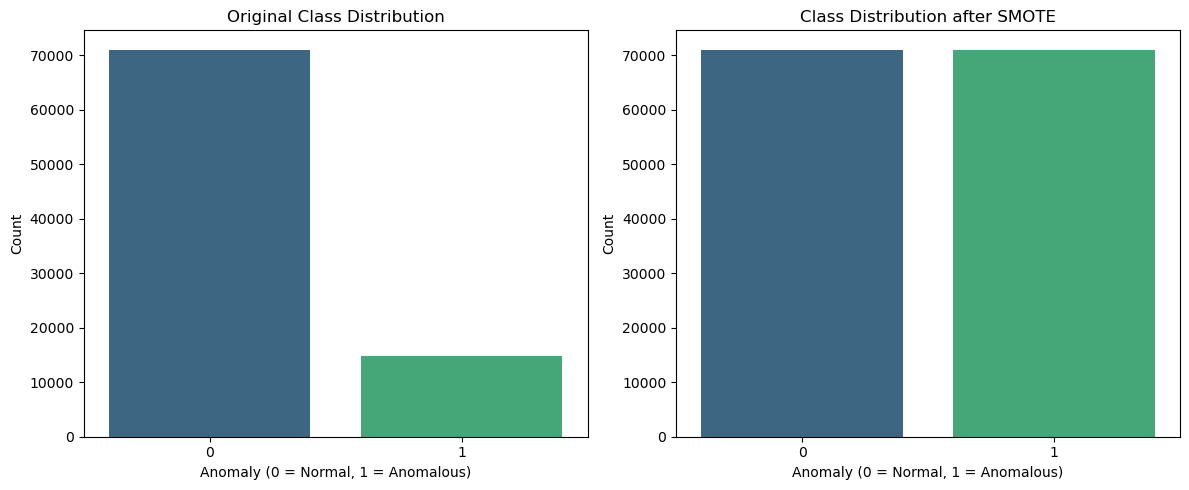

Original dataset shape: {X.shape}
Resampled dataset shape: {X_resampled.shape}


In [7]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


# Separate features and target variable
X = data.drop(['Anomaly', 'Outcode', 'Postcode'], axis=1)  
# Dropping non-numeric columns
y = data['Anomaly']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Check new class distribution
new_class_counts = pd.Series(y_resampled).value_counts()
print("New class counts after SMOTE:")
print(new_class_counts)

# Visualize new class distribution
plt.figure(figsize=(12, 5))

# Original distribution
plt.subplot(1, 2, 1)
sns.countplot(x=y, palette='viridis')
plt.title('Original Class Distribution')
plt.xlabel('Anomaly (0 = Normal, 1 = Anomalous)')
plt.ylabel('Count')

# New distribution after SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled, palette='viridis')
plt.title('Class Distribution after SMOTE')
plt.xlabel('Anomaly (0 = Normal, 1 = Anomalous)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Save the resampled data
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['Anomaly'] = y_resampled

#resampled_df.to_csv('new_data_resampled.csv', index=False)
#Print shape of original and resampled datasets
print("Original dataset shape: ", X.shape)
print("Resampled dataset shape: ", X_resampled.shape)

SPLITTING THE DATA FOR MODELLING

In [11]:
from sklearn.model_selection import train_test_split


# Separate features and target
X = resampled_data.drop('Anomaly', axis=1)
y = resampled_data['Anomaly']

# First, split off the test set (15% of the data)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

# Then split the remaining data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp)  # 0.1765 is 15/85, to get 15% of the original data

# Check the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

# Check the distribution of classes in each set
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in validation set:")
print(y_val.value_counts(normalize=True))

print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))

# Save the splits
train_df = pd.concat([X_train, y_train], axis=1)
val_df = pd.concat([X_val, y_val], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

train_df.to_csv('train_set.csv', index=False)
val_df.to_csv('validation_set.csv', index=False)
test_df.to_csv('test_set.csv', index=False)

Training set shape: (99373, 14)
Validation set shape: (21299, 14)
Test set shape: (21296, 14)

Class distribution in training set:
Anomaly
1    0.500005
0    0.499995
Name: proportion, dtype: float64

Class distribution in validation set:
Anomaly
0    0.500023
1    0.499977
Name: proportion, dtype: float64

Class distribution in test set:
Anomaly
0    0.5
1    0.5
Name: proportion, dtype: float64

Data splits saved as 'train_set.csv', 'validation_set.csv', and 'test_set.csv'



Training and evaluating Random Forest...


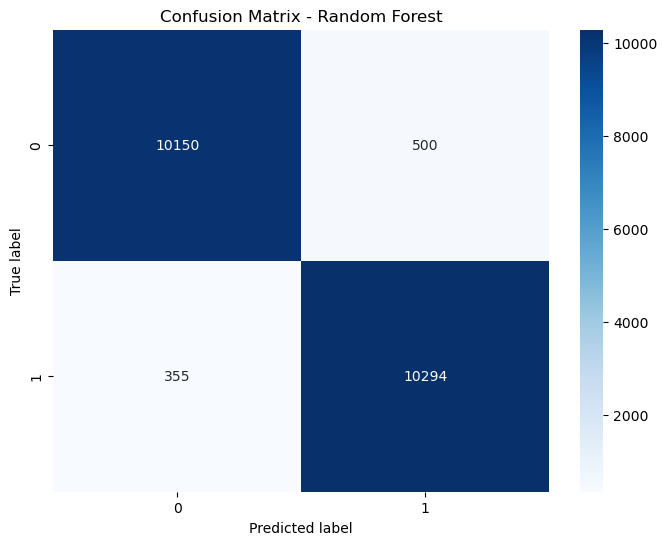

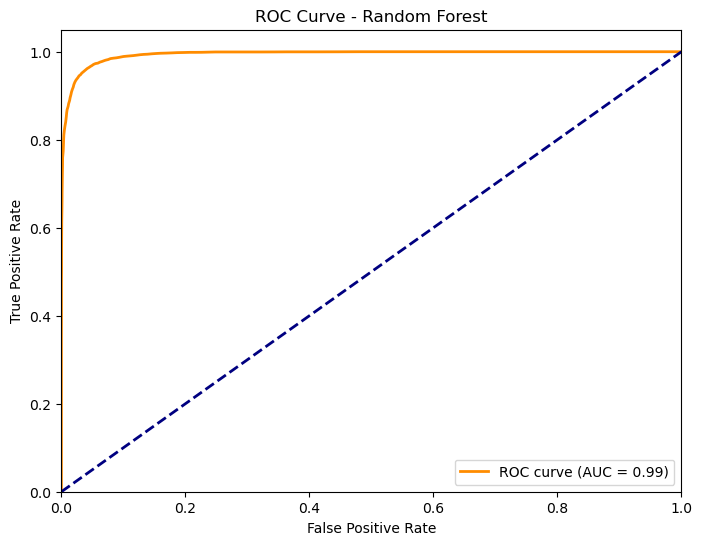


Training and evaluating Decision Tree...


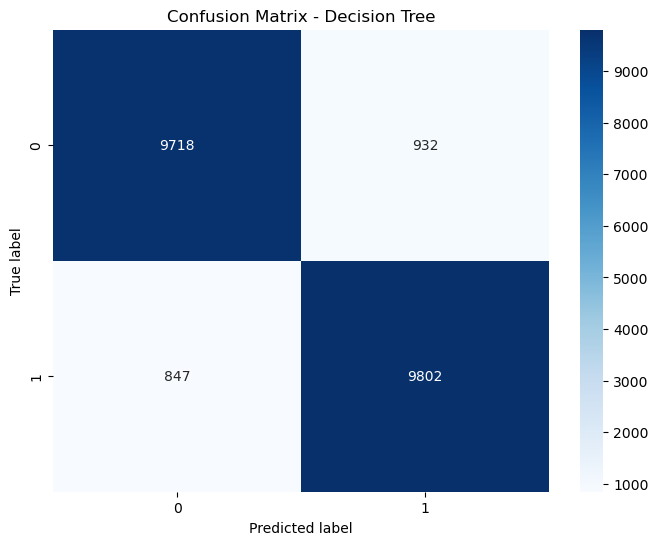

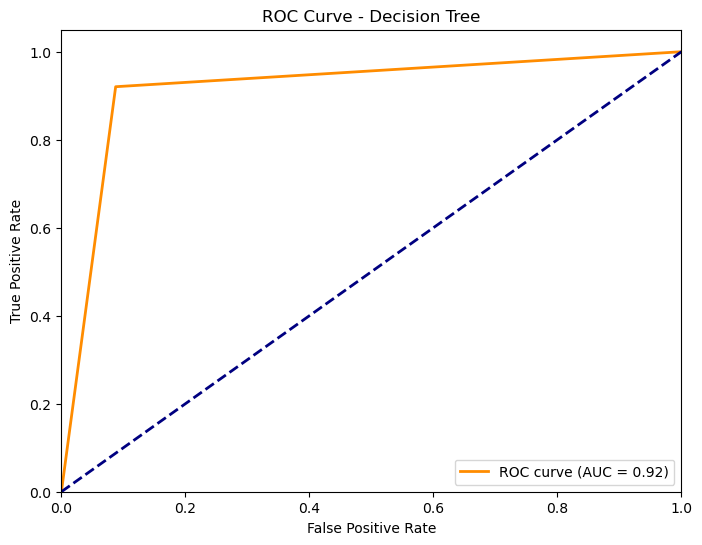


Training and evaluating KNN...


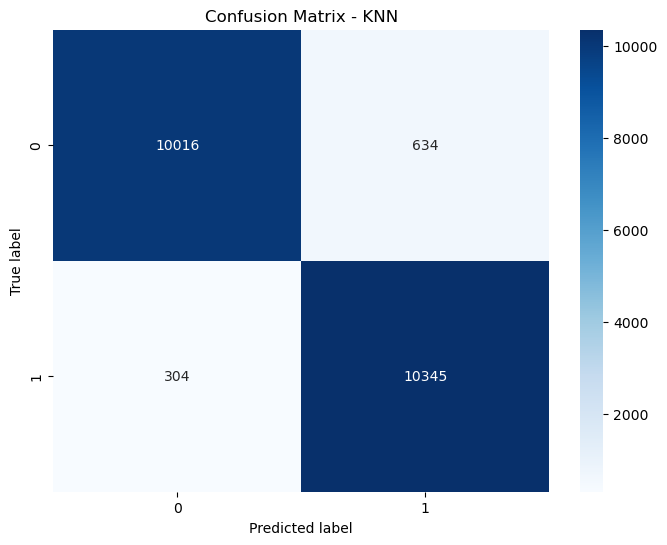

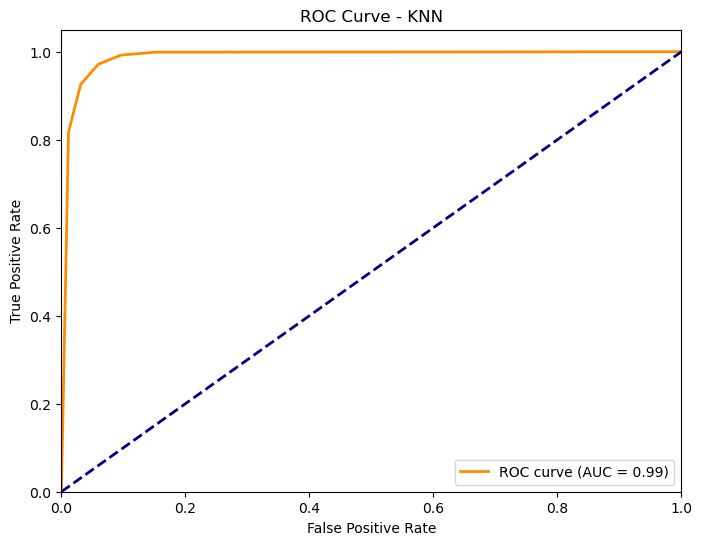


Training and evaluating Gradient Boosting...


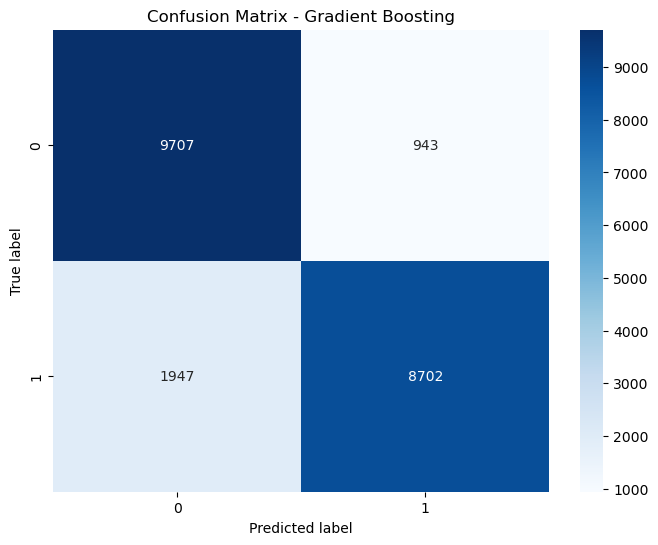

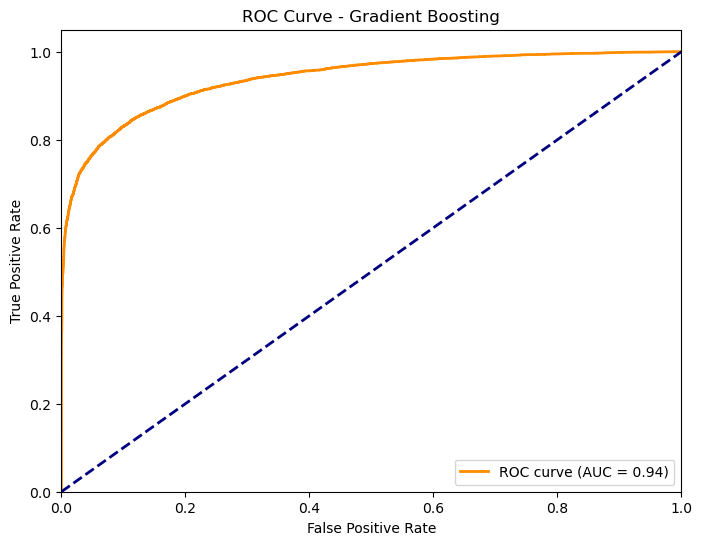


Model Evaluation Results:
                   Accuracy  Precision    Recall  F1-score   ROC-AUC
Random Forest      0.959857   0.953678  0.966664  0.960127  0.993867
Decision Tree      0.916475   0.913173  0.920462  0.916803  0.916475
KNN                0.955960   0.942253  0.971453  0.956630  0.987899
Gradient Boosting  0.864313   0.902229  0.817166  0.857593  0.939446


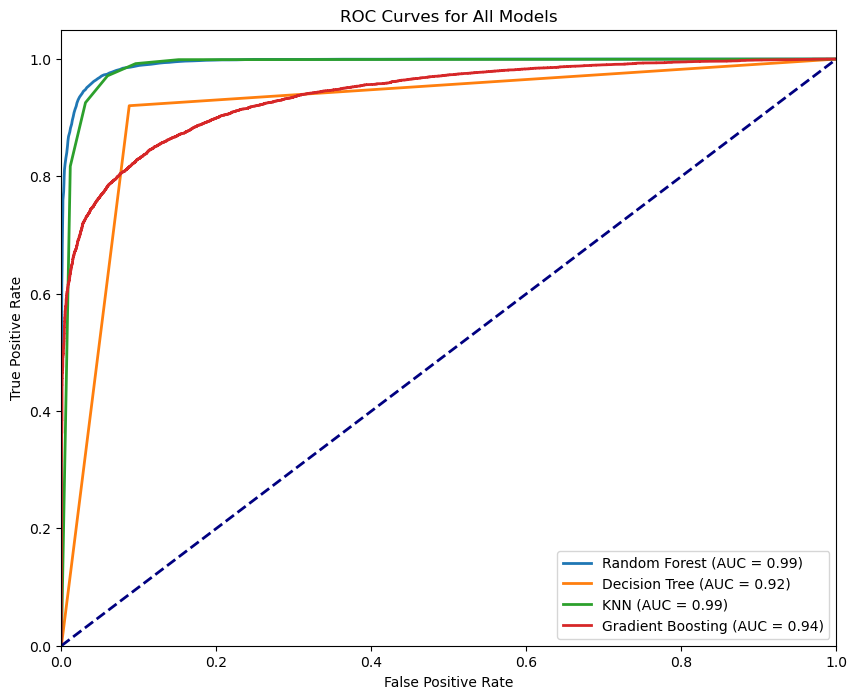


Training complete. Confusion matrices and ROC curves have been plotted.


In [12]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve

# Load the datasets
train_df = pd.read_csv('train_set.csv')
val_df = pd.read_csv('validation_set.csv')
test_df = pd.read_csv('test_set.csv')

# Separate features and target
X_train = train_df.drop('Anomaly', axis=1)
y_train = train_df['Anomaly']
X_val = val_df.drop('Anomaly', axis=1)
y_val = val_df['Anomaly']
X_test = test_df.drop('Anomaly', axis=1)
y_test = test_df['Anomaly']

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, title):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Train, validate, and test models
results = {}

for name, model in models.items():
    print(f"\nTraining and evaluating {name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on validation set
    y_val_pred = model.predict(X_val_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    roc_auc = roc_auc_score(y_val, model.predict_proba(X_val_scaled)[:, 1])
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC-AUC': roc_auc
    }
    
    # Plot confusion matrix
    cm = confusion_matrix(y_val, y_val_pred)
    plot_confusion_matrix(cm, f'Confusion Matrix - {name}')
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_val, model.predict_proba(X_val_scaled)[:, 1])
    plot_roc_curve(fpr, tpr, roc_auc, f'ROC Curve - {name}')

# Print results
print("\nModel Evaluation Results:")
results_df = pd.DataFrame(results).T
print(results_df)

# Plot ROC curves for all models in one graph
plt.figure(figsize=(10, 8))
for name, model in models.items():
    fpr, tpr, _ = roc_curve(y_val, model.predict_proba(X_val_scaled)[:, 1])
    roc_auc = roc_auc_score(y_val, model.predict_proba(X_val_scaled)[:, 1])
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc="lower right")
plt.show()

print("\nTraining complete. Confusion matrices and ROC curves have been plotted.")

HYPER PARAMETER TUNING USING GRID SEARCH

Performing grid search for Random Forest with a subset of parameters...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for Random Forest (subset):  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score (subset):  0.9553215994140969

Random Forest Evaluation Results after Grid Search (subset):
                        Accuracy  Precision   Recall  F1-score   ROC-AUC
Random Forest (subset)  0.960702   0.954259  0.96779  0.960977  0.994111

Random Forest grid search (subset) complete. ROC curve has been plotted and saved.


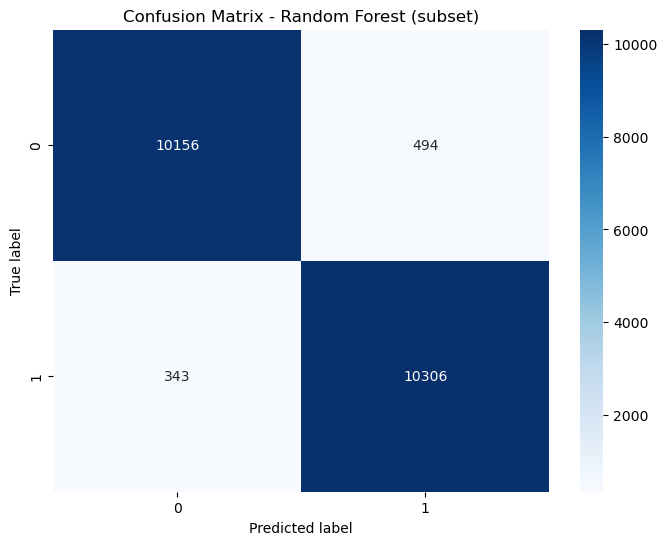

Confusion matrix for Random Forest (subset) has been plotted and saved.


In [15]:
from sklearn.model_selection import GridSearchCV


# Load the datasets
train_df = pd.read_csv('train_set.csv')
val_df = pd.read_csv('validation_set.csv')

# Separate features and target
X_train = train_df.drop('Anomaly', axis=1)
y_train = train_df['Anomaly']
X_val = val_df.drop('Anomaly', axis=1)
y_val = val_df['Anomaly']

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Perform grid search for Random Forest with a subset of parameters
print("Performing grid search for Random Forest with a subset of parameters...")
rf_param_grid_subset = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

rf_grid_search_subset = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid_subset, cv=5, n_jobs=-1, verbose=1, scoring='f1')
rf_grid_search_subset.fit(X_train_scaled, y_train)
best_rf_model_subset = rf_grid_search_subset.best_estimator_
print("Best parameters for Random Forest (subset): ", rf_grid_search_subset.best_params_)
print("Best cross-validation score (subset): ", rf_grid_search_subset.best_score_)

# Evaluate the best Random Forest model on the validation set
rf_y_val_pred_subset = best_rf_model_subset.predict(X_val_scaled)
rf_accuracy_subset = accuracy_score(y_val, rf_y_val_pred_subset)
rf_precision_subset = precision_score(y_val, rf_y_val_pred_subset)
rf_recall_subset = recall_score(y_val, rf_y_val_pred_subset)
rf_f1_subset = f1_score(y_val, rf_y_val_pred_subset)
rf_roc_auc_subset = roc_auc_score(y_val, best_rf_model_subset.predict_proba(X_val_scaled)[:, 1])

rf_results_subset = {
    'Accuracy': rf_accuracy_subset,
    'Precision': rf_precision_subset,
    'Recall': rf_recall_subset,
    'F1-score': rf_f1_subset,
    'ROC-AUC': rf_roc_auc_subset
}

print("\nRandom Forest Evaluation Results after Grid Search (subset):")
print(pd.DataFrame(rf_results_subset, index=["Random Forest (subset)"]))

# Plot ROC curve for the best Random Forest model (subset)
from sklearn.metrics import roc_curve
rf_y_val_pred_proba_subset = best_rf_model_subset.predict_proba(X_val_scaled)[:, 1]
rf_fpr_subset, rf_tpr_subset, _ = roc_curve(y_val, rf_y_val_pred_proba_subset)
plt.figure(figsize=(10, 8))
plt.plot(rf_fpr_subset, rf_tpr_subset, lw=2, label='Random Forest (AUC = {:.2f})'.format(rf_roc_auc_subset))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest after Grid Search (subset)')
plt.legend(loc="lower right")
plt.savefig('roc_curve_rf_after_grid_search_subset.png')
plt.close()

print("\nRandom Forest grid search (subset) complete. ROC curve has been plotted and saved.")

# Plot confusion matrix for the best Random Forest model (subset)
rf_cm_subset = confusion_matrix(y_val, rf_y_val_pred_subset)
plot_confusion_matrix(rf_cm_subset, 'Confusion Matrix - Random Forest (subset)')
print("Confusion matrix for Random Forest (subset) has been plotted and saved.")

FEATURE IMPORTANCE

Feature Importances:
                                  feature  importance
0                      Population_Density    0.104511
1   Electricity_Consumption_per_Household    0.094983
2                          Total_cons_kwh    0.087566
3                         Median_cons_kwh    0.084668
4                                   Males    0.084288
5                              Num_meters    0.083559
6                     Occupied_Households    0.081839
7                                 Females    0.076361
8                       Energy_Efficiency    0.073601
9                           Mean_cons_kwh    0.073321
10                                  Total    0.063116
11                        Outcode_encoded    0.040266
12                       Postcode_encoded    0.037537
13                                Cluster    0.014383


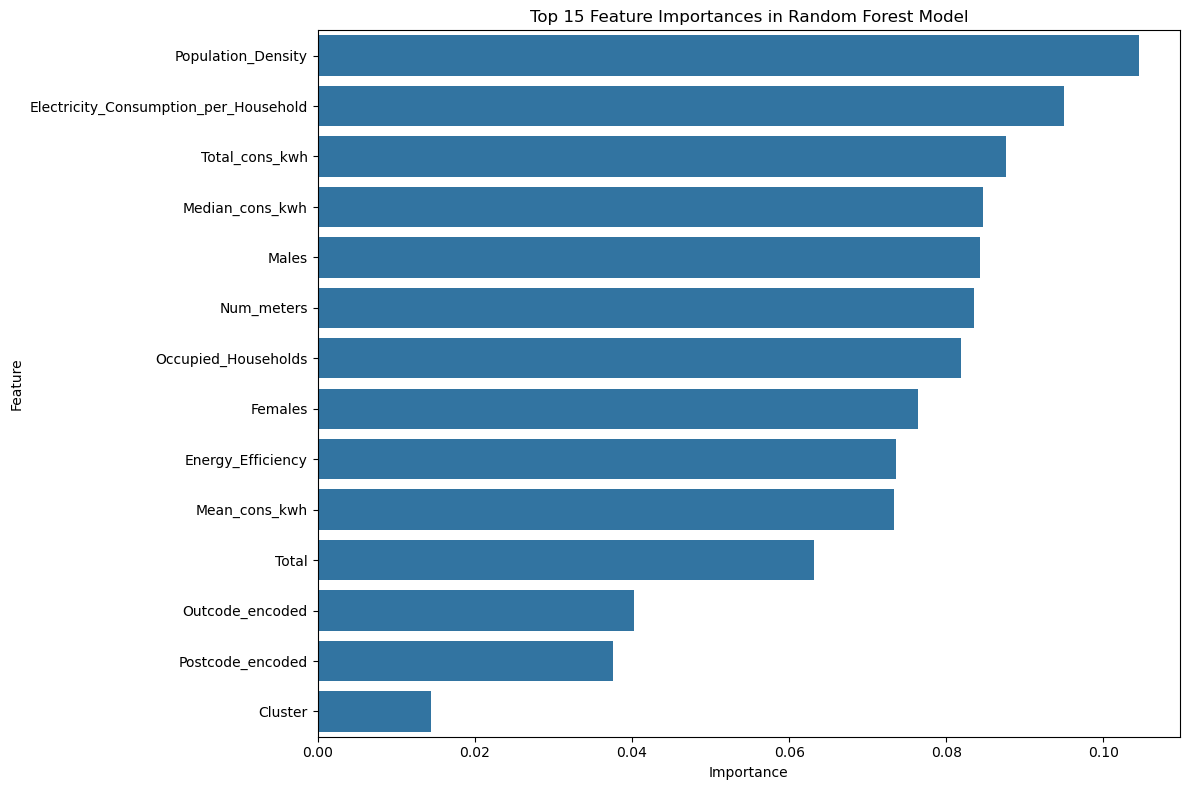


Number of features accounting for 95% of the importance: 12

Top features accounting for 95% of the importance:
['Population_Density', 'Electricity_Consumption_per_Household', 'Total_cons_kwh', 'Median_cons_kwh', 'Males', 'Num_meters', 'Occupied_Households', 'Females', 'Energy_Efficiency', 'Mean_cons_kwh', 'Total', 'Outcode_encoded']


In [18]:
# Get feature importances
importances = best_rf_model_subset.feature_importances_
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False).reset_index(drop=True)

# Print feature importances
print("Feature Importances:")
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances.head(15))
plt.title('Top 15 Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Calculate cumulative importance
feature_importances['cumulative_importance'] = feature_importances['importance'].cumsum()

# Find number of features for 95% cumulative importance
features_for_95 = feature_importances[feature_importances['cumulative_importance'] <= 0.95].shape[0]
print(f"\nNumber of features accounting for 95% of the importance: {features_for_95}")

# Optionally, print these top features
print("\nTop features accounting for 95% of the importance:")
print(feature_importances.head(features_for_95)['feature'].tolist())

ERROR ANALYSIS ON MISCLASSIFIED DATAPOINTS

In [32]:
# Perform error analysis
y_pred = best_rf_model_subset.predict(X_val_scaled)
misclassified = X_val[y_val != y_pred].copy()
misclassified['true_label'] = y_val[y_val != y_pred]
misclassified['predicted_label'] = y_pred[y_val != y_pred]

# Add probability scores for the predicted class
probabilities = best_rf_model_subset.predict_proba(X_val_scaled[y_val != y_pred])
misclassified['probability_score'] = np.max(probabilities, axis=1)

# Sort by probability score to see the most "confident" misclassifications
misclassified_sorted = misclassified.sort_values('probability_score', ascending=False)

print("Number of misclassified instances:", len(misclassified))
print("\nTop 10 most confident misclassifications:")
misclassified_sorted.head(10)

Number of misclassified instances: 837

Top 10 most confident misclassifications:


,Num_meters,Total_cons_kwh,Mean_cons_kwh,Median_cons_kwh,Total,Males,Females,Occupied_Households,Cluster,Electricity_Consumption_per_Household,Population_Density,Energy_Efficiency,Outcode_encoded,Postcode_encoded,true_label,predicted_label,probability_score
6123,0.358147,0.033189,-0.340166,-0.127488,3.015884,2.768548,3.117364,2.147678,-0.430179,-0.328938,0.811333,-0.313026,0.471260,0.465511,0,1,0.975
3864,-0.320247,-0.022176,0.736356,1.147059,-1.592720,-1.572476,-1.537812,-1.655916,-1.735373,1.858741,-0.657818,1.653134,0.190561,0.207057,0,1,0.960
20046,-0.659444,-0.745058,-1.106329,-0.630461,-1.284693,-1.424487,-1.086935,-1.382106,0.875016,-0.262363,-0.111311,-0.226049,-0.713865,-0.693653,1,0,0.950
15796,-0.659444,-0.462793,0.253763,-0.261265,-1.116832,-1.128508,-1.052898,-1.402343,0.875016,0.185227,0.870894,-0.043521,-0.489442,-0.499694,1,0,0.950
2089,2.732527,0.410500,-1.075048,-0.888566,0.210647,0.844685,-0.422509,2.274464,-0.430179,-0.247023,-1.460712,-0.028941,1.186844,1.229128,0,1,0.940
8526,-0.546378,0.696001,4.531538,0.754213,1.162424,1.042004,1.226199,0.753027,-1.735373,0.028865,0.543313,-0.097681,-0.145487,-0.199833,0,1,0.940
1700,-0.433313,-0.249728,0.343771,0.482998,-1.667860,-1.671136,-1.586303,-1.655916,0.875016,1.251900,-1.312980,1.716662,-0.382698,-0.366634,0,1,0.930
13009,-0.320247,-0.299990,-0.100298,-0.401992,-0.766177,-0.437890,-1.052898,-1.021984,0.875016,0.067653,0.543313,-0.075345,0.985216,1.097802,1,0,0.910
10867,-0.320247,-0.450517,-0.553618,-0.115871,0.260740,-0.043252,0.547319,0.499454,0.875016,-0.370636,-0.275640,-0.295237,0.914052,1.064224,1,0,0.910
15313,-0.659444,0.218560,3.536864,2.150655,-0.866364,-0.783199,-0.907423,-1.275557,-1.735373,0.969136,1.307668,0.289418,0.095677,0.075530,0,1,0.905


In [23]:
# Analyze misclassifications by true label
misclassification_by_true_label = misclassified['true_label'].value_counts()
print("\nMisclassifications by true label:")
misclassification_by_true_label

# Calculate mean values for misclassified vs correctly classified instances
misclassified_mean = misclassified.mean()
correctly_classified_mean = X_val[y_val == y_pred].mean()

print("\nMean values for misclassified instances:")
print(misclassified_mean)
print("\nMean values for correctly classified instances:")
print(correctly_classified_mean)


Misclassifications by true label:

Mean values for misclassified instances:
Num_meters                               0.068592
Total_cons_kwh                           0.037957
Mean_cons_kwh                            0.116925
Median_cons_kwh                          0.077375
Total                                    0.055397
Males                                    0.066461
Females                                  0.041920
Occupied_Households                      0.115954
Cluster                                 -0.127660
Electricity_Consumption_per_Household    0.010455
Population_Density                       0.006599
Energy_Efficiency                       -0.000854
Outcode_encoded                         -0.021064
Postcode_encoded                        -0.025294
true_label                               0.409797
predicted_label                          0.590203
probability_score                        0.626912
dtype: float64

Mean values for correctly classified instances:
Num_meter

In [24]:
# Calculate the difference in means
mean_difference = misclassified_mean - correctly_classified_mean
print("\nDifference in means (misclassified - correctly classified):")
mean_difference.sort_values(ascending=False)


Difference in means (misclassified - correctly classified):


Cluster                                  0.097957
Population_Density                       0.027325
Postcode_encoded                        -0.036470
Outcode_encoded                         -0.037117
Occupied_Households                     -0.053984
Males                                   -0.055719
Total                                   -0.066325
Females                                 -0.073634
Mean_cons_kwh                           -0.127360
Median_cons_kwh                         -0.147125
Electricity_Consumption_per_Household   -0.209916
Energy_Efficiency                       -0.211604
Num_meters                              -0.271450
Total_cons_kwh                          -0.360181
predicted_label                               NaN
probability_score                             NaN
true_label                                    NaN
dtype: float64

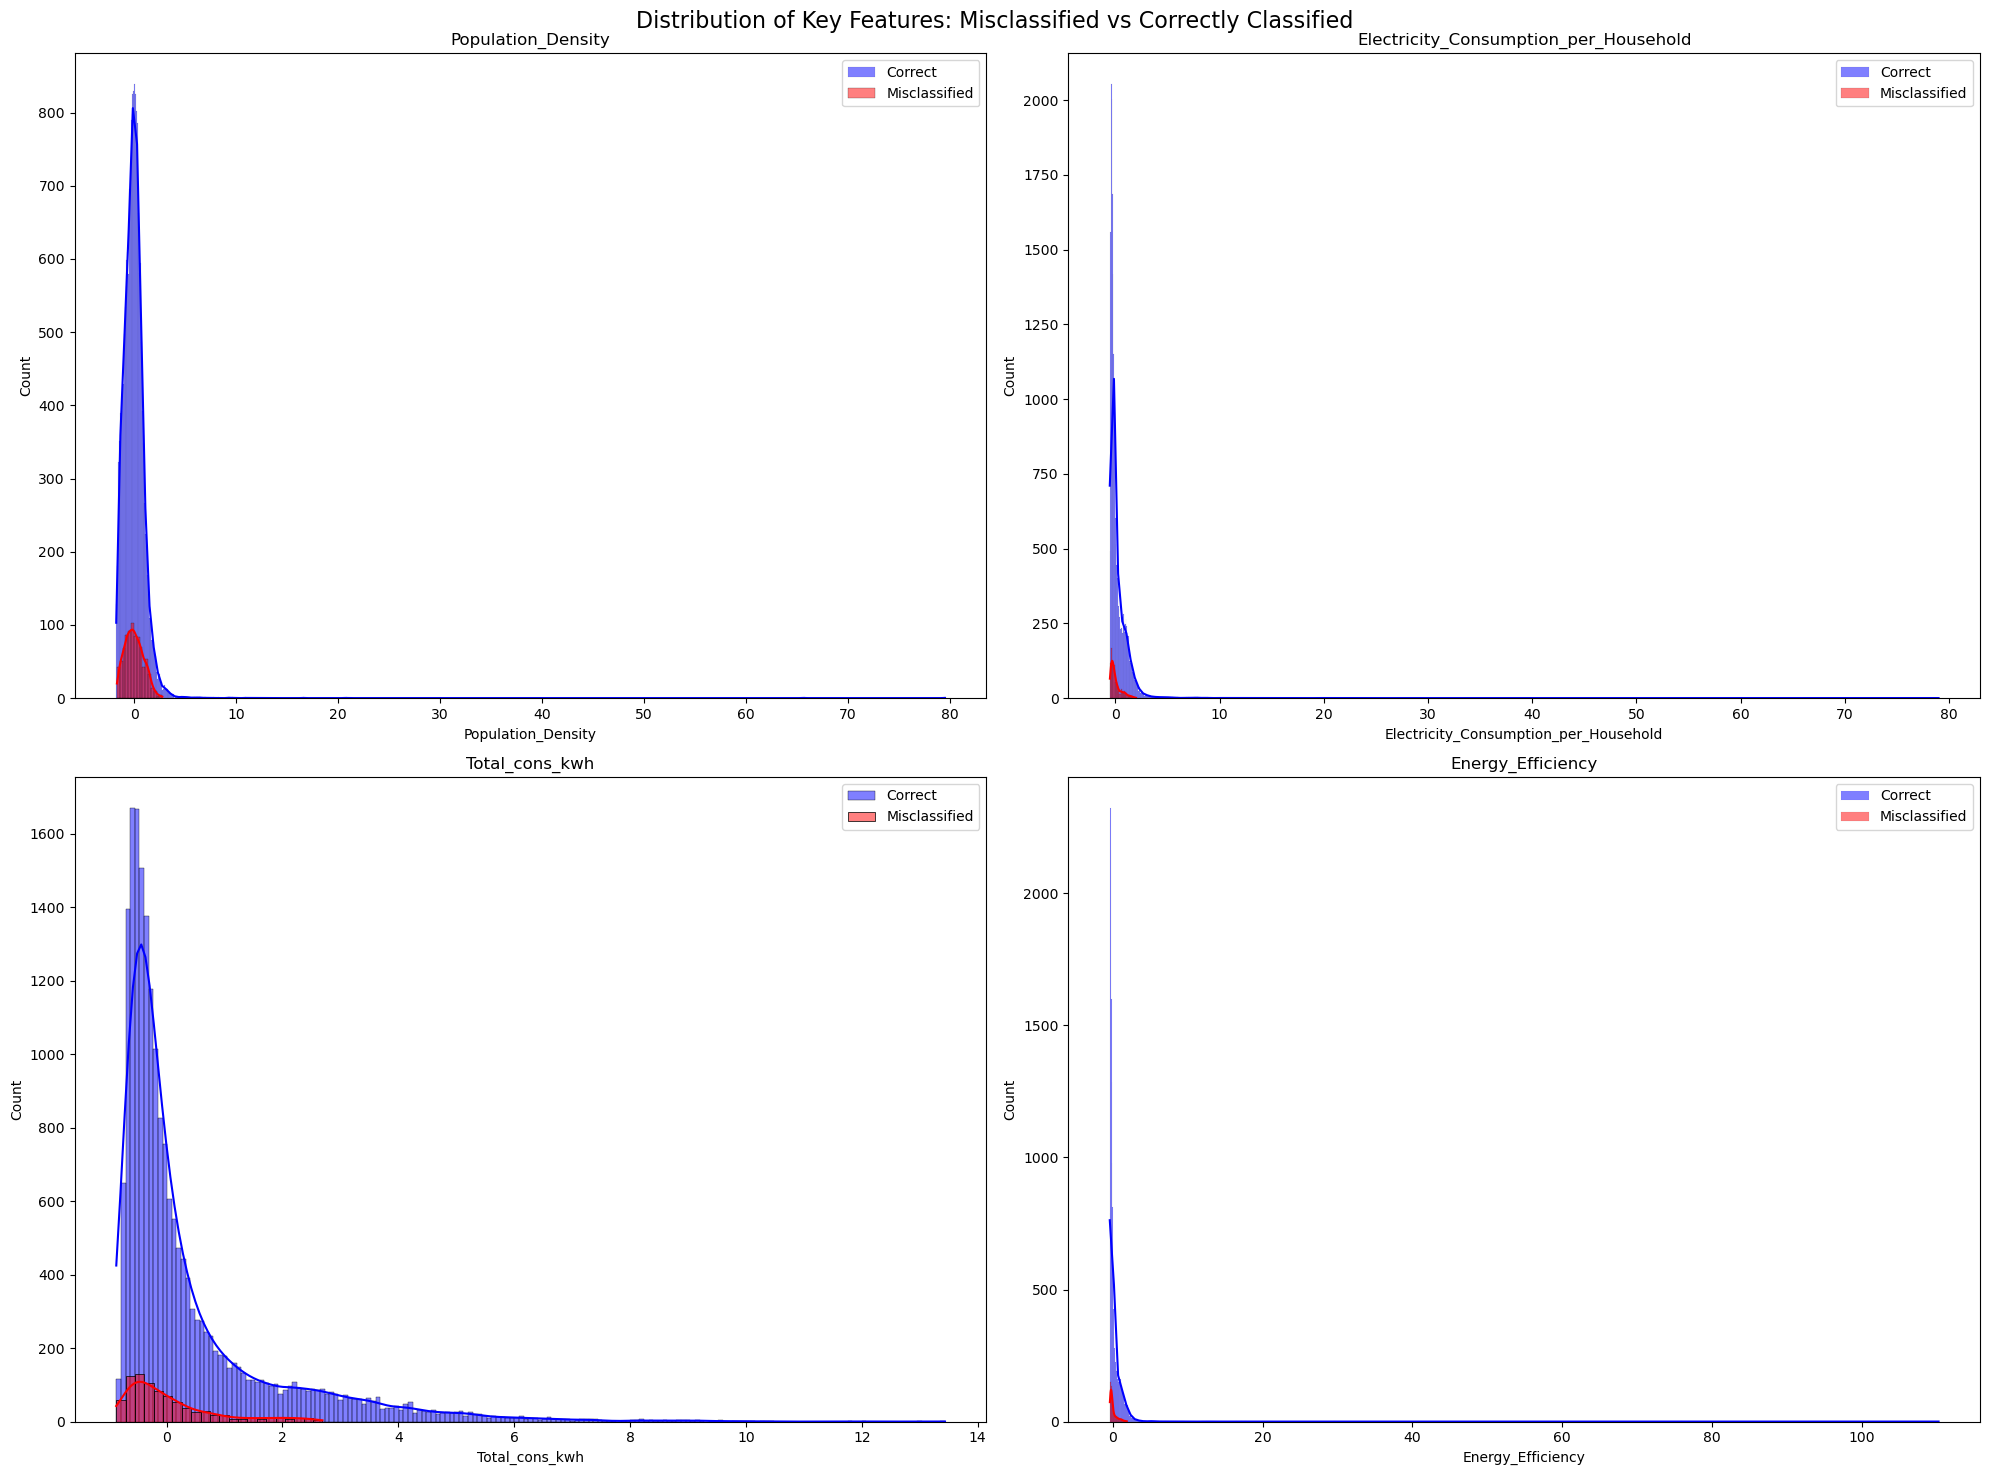

In [25]:
# Visualize the distribution of a few key features for misclassified vs correctly classified instances
key_features = ['Population_Density', 'Electricity_Consumption_per_Household', 'Total_cons_kwh', 'Energy_Efficiency']

fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Distribution of Key Features: Misclassified vs Correctly Classified', fontsize=16)

for i, feature in enumerate(key_features):
    ax = axes[i // 2, i % 2]
    sns.histplot(data=X_val[y_val == y_pred], x=feature, kde=True, color='blue', alpha=0.5, ax=ax, label='Correct')
    sns.histplot(data=misclassified, x=feature, kde=True, color='red', alpha=0.5, ax=ax, label='Misclassified')
    ax.set_title(feature)
    ax.legend()

plt.tight_layout()
plt.show()

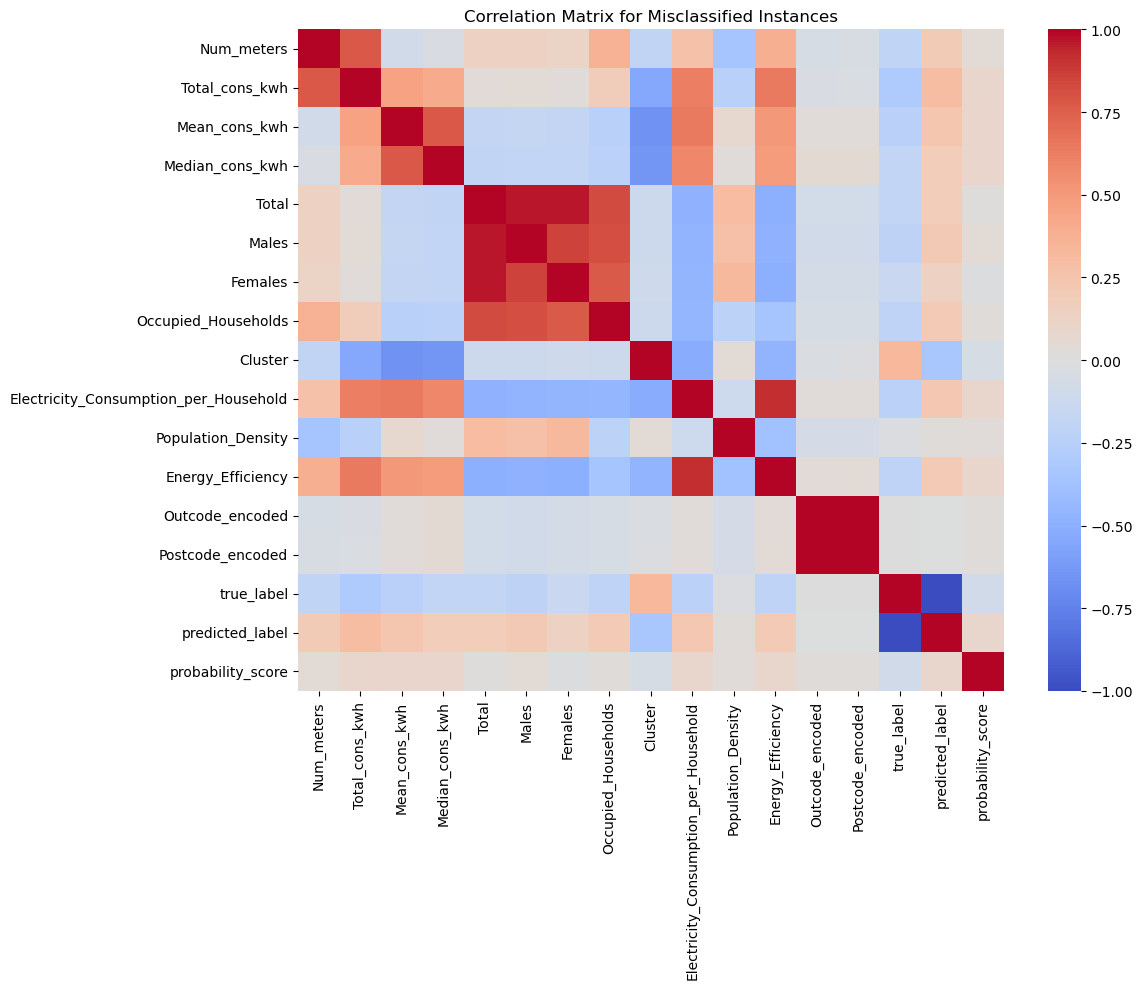

In [26]:
# Correlation analysis for misclassified instances
correlation_matrix = misclassified.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix for Misclassified Instances')
plt.tight_layout()
plt.show()

VISUALISATION OF THE TREES

In [29]:
#pip install graphviz
from sklearn.tree import export_graphviz
import graphviz

# Visualize a few trees from the Random Forest
num_trees_to_visualize = 3

for i in range(num_trees_to_visualize):
    tree = best_rf_model_subset.estimators_[i]
    dot_data = export_graphviz(tree, out_file=None, 
                               feature_names=X_train.columns, 
                               filled=True, rounded=True, 
                               special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.render(f'random_forest_tree_{i}')

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH